Question List:
1. Test Size/other specifications 
2. Cross Classification
3. Data Exploration 

## Importing Packages

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import VotingClassifier
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
import xgboost as xgb
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import confusion_matrix

## Data Cleaning and Exploration

In [ ]:
#Load Dataset
df_read = pd.read_csv('camera_dataset.csv')
df = pd.DataFrame(df_read)
df.head()

Model  Release date  ...  Dimensions   Price
0        Agfa ePhoto 1280          1997  ...        95.0   179.0
1        Agfa ePhoto 1680          1998  ...       158.0   179.0
2        Agfa ePhoto CL18          2000  ...         0.0   179.0
3        Agfa ePhoto CL30          1999  ...         0.0   269.0
4  Agfa ePhoto CL30 Clik!          1999  ...       128.0  1299.0

[5 rows x 13 columns]

In [ ]:
#Drop categorical columns
df = df.drop(columns=['Model', 'Release date'])
# Storing data set specifically for regression models
df_reg = df
#Drop All Rows with Null values
df.info()
df = df.dropna() 
df_reg = df_reg.dropna()
#Remove white space in column names for xgb model
df.rename(columns = lambda x: x.replace(' ', '_'), inplace=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1038 entries, 0 to 1037
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Max resolution           1038 non-null   float64
 1   Low resolution           1038 non-null   float64
 2   Effective pixels         1038 non-null   float64
 3   Zoom wide (W)            1038 non-null   float64
 4   Zoom tele (T)            1038 non-null   float64
 5   Normal focus range       1038 non-null   float64
 6   Macro focus range        1037 non-null   float64
 7   Storage included         1036 non-null   float64
 8   Weight (inc. batteries)  1036 non-null   float64
 9   Dimensions               1036 non-null   float64
 10  Price                    1038 non-null   float64
dtypes: float64(11)
memory usage: 89.3 KB


In [ ]:
# interested in turning price into a categorical variable for classification purposes

#price range
print(df.Price.max())
print(df.Price.min())

Acount = 0
Bcount = 0
Ccount = 0
Dcount = 0
Ecount = 0
Fcount = 0
Gcount = 0
Hcount = 0

#establish categories for each desired price range
for x in df.Price:
  if x <= 100:
    Acount += 1
    df.loc[df.Price == x, 'Price'] = "A"
  if 100 < x <= 150:
    Bcount += 1
    df.loc[df.Price == x, 'Price'] = "B"
  if 150 < x <= 200:
    Ccount += 1
    df.loc[df.Price == x, 'Price'] = "C"
  if 200 < x <= 300:
    Dcount += 1
    df.loc[df.Price == x, 'Price'] = "D"
  if 300 < x <= 500:
    Ecount += 1
    df.loc[df.Price == x, 'Price'] = "E"
  if 500 < x <= 1000:
    Fcount += 1
    df.loc[df.Price == x, 'Price'] = "F"
  if 1000 < x <= 3000:
    Gcount += 1
    df.loc[df.Price == x, 'Price'] = "G"
  if 3000 < x:
    Hcount += 1
    df.loc[df.Price == x, 'Price'] = "H"



#Show the distribution of the categories 
print(Acount)
print(Bcount)
print(Ccount)
print(Dcount)
print(Ecount)
print(Fcount)
print(Gcount)
print(Hcount)


7999.0
14.0
46
291
189
201
146
25
123
15


In [ ]:
#Split in Training and Test
# Camera Price is going to be the target variable

#regression target variable (the raw price as opposed to category)
yr = df_reg.Price

y = df.Price
x = df.drop('Price', axis=1)

print(x)
print(y)

#classification
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 2020)

#storing for regression models
xr_train, xr_test, yr_train, yr_test = train_test_split(x, yr, test_size = 0.2, random_state = 2020)

#Dummy Classifiers to observe baseline model accuracy for classification

dummy_classifier = DummyClassifier(strategy='most_frequent')
dummy_classifier.fit(x_train,y_train)
baseline_acc = dummy_classifier.score(x_test,y_test)
                                                  
print("Baseline Accuracy = ", baseline_acc)

      Max_resolution  Low_resolution  ...  Weight_(inc._batteries)  Dimensions
0             1024.0           640.0  ...                    420.0        95.0
1             1280.0           640.0  ...                    420.0       158.0
2              640.0             0.0  ...                      0.0         0.0
3             1152.0           640.0  ...                      0.0         0.0
4             1152.0           640.0  ...                    300.0       128.0
...              ...             ...  ...                      ...         ...
1033          2048.0          1024.0  ...                    320.0       120.0
1034          2048.0          1024.0  ...                    390.0       116.0
1035          2048.0          1024.0  ...                    340.0       107.0
1036          2400.0          1200.0  ...                    340.0       107.0
1037          1600.0           800.0  ...                    180.0        86.0

[1036 rows x 10 columns]
0       C
1       C
2     

In [ ]:
# Data exploration
# making sure everything looks clean 

df.info()
df.shape

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1036 entries, 0 to 1037
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Max_resolution           1036 non-null   float64
 1   Low_resolution           1036 non-null   float64
 2   Effective_pixels         1036 non-null   float64
 3   Zoom_wide_(W)            1036 non-null   float64
 4   Zoom_tele_(T)            1036 non-null   float64
 5   Normal_focus_range       1036 non-null   float64
 6   Macro_focus_range        1036 non-null   float64
 7   Storage_included         1036 non-null   float64
 8   Weight_(inc._batteries)  1036 non-null   float64
 9   Dimensions               1036 non-null   float64
 10  Price                    1036 non-null   object 
dtypes: float64(10), object(1)
memory usage: 97.1+ KB


(1036, 11)

## Baseline Model Testing

> Testing Regression and Classification models to see which have the most promising outcomes 



In [ ]:
#Linear Regression (regression df)


model = LinearRegression()
model.fit(xr_train, yr_train)

#Train 
yr_pred_train = model.predict(xr_train)
MSE = mean_squared_error(yr_train, yr_pred_train)
R2 = r2_score(yr_train, yr_pred_train)
print("Predictions on the train set")
print("MSE:", MSE)
print("Coefficient of R^2:", R2)

#Test
yr_pred_test = model.predict(xr_test)
MSE = mean_squared_error(yr_test, yr_pred_test)
R2 = r2_score(yr_test, yr_pred_test)
print()
print("Predictions on the test set")
print("MSE:", MSE)
print("Coefficient of R^2:", R2)


Predictions on the train set
MSE: 418817.11354437156
Coefficient of R^2: 0.3123049928185816

Predictions on the test set
MSE: 356128.28431307455
Coefficient of R^2: 0.22058047846385465


In [ ]:
# Decision Tree Regression (regression df)

#model = DecisionTreeRegressor()
#model.fit(xr_train, xr_train)
#yr_pred = model.predict(xr_test)

#print(yr_pred)
#print(yr_test)

#MSE = mean_squared_error(yr_test, yr_pred)
#R2 = r2_score(yr_test,yr_pred)

[[ 0  6  1  1  0  0  1  0]
 [ 0 30  7 17  6  0  6  1]
 [ 0 24  4  7  2  0  2  0]
 [ 0 16  3 13  2  0  0  0]
 [ 0 14  2  7  5  0  0  0]
 [ 0  1  1  1  1  0  1  0]
 [ 0  8  1  0  1  0 12  1]
 [ 0  0  0  0  0  0  1  2]]
Accuracy = 0.3173076923076923


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


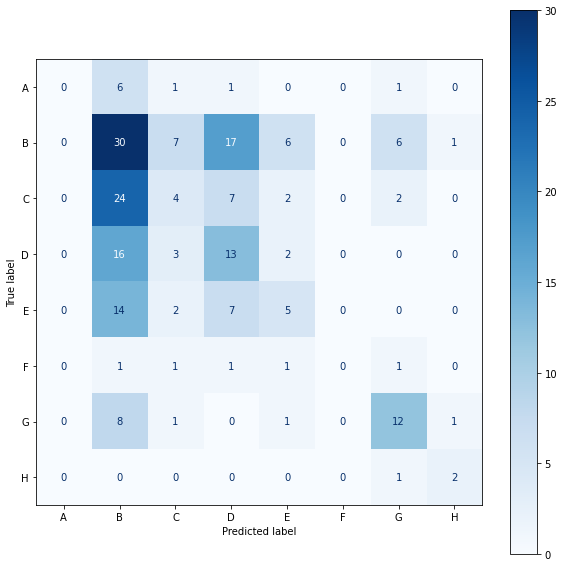

In [ ]:
# Logistic Regression (classification df)

model = LogisticRegression()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

cnf_matrix = metrics.confusion_matrix(y_test, y_pred)

print(cnf_matrix)
print('Accuracy =', metrics.accuracy_score(y_test, y_pred))

fig, ax = plt.subplots(figsize=(10, 10))
metrics.plot_confusion_matrix(model, x_test, y_test, cmap=plt.cm.Blues, ax=ax)


In [ ]:
# Decision Tree (classification df)

chosen_model = DecisionTreeClassifier(max_depth=20, criterion = 'entropy', random_state=42)
chosen_model.fit(x_train, y_train)
y_pred = chosen_model.predict(x_test)

cf = metrics.confusion_matrix(y_test, y_pred)
print(cf)

print('Accuracy =', metrics.accuracy_score(y_test, y_pred))


[[ 6  0  0  1  1  0  1  0]
 [ 0 42  7  7  6  1  3  1]
 [ 0  5 21  6  4  1  1  1]
 [ 1  4  2 20  2  0  5  0]
 [ 1  4  2  3 17  0  1  0]
 [ 0  0  0  3  0  0  2  0]
 [ 0  0  0  5  2  1 15  0]
 [ 0  0  0  0  0  0  1  2]]
Accuracy = 0.5913461538461539


## Fine Tuning/Further Exploration of Models

In [ ]:
#Bagging
model_bagging = BaggingClassifier(DecisionTreeClassifier(max_depth=20, criterion = 'entropy', random_state=42), random_state=2020, n_estimators=100)
model_bagging.fit(x_train, y_train)
pred_bagging = model_bagging.predict(x_test)
acc_bagging = accuracy_score(y_test, pred_bagging)

print('Accuracy = ', acc_bagging)

Accuracy =  0.6586538461538461


In [ ]:
#Random Forest
model_rf = RandomForestClassifier(n_estimators=300, max_features=8, random_state=42)
model_rf.fit(x_train, y_train)
predict_rf = model_rf.predict(x_test)
print('Accuracy score', accuracy_score(y_test, predict_rf))

#Feature importance
importance = model_rf.feature_importances_

important_features = pd.Series(data=importance,index=x.columns)
important_features.sort_values(ascending=False,inplace=True)
print(important_features)

Accuracy score 0.6682692307692307
Weight_(inc._batteries)    0.167906
Dimensions                 0.150372
Zoom_tele_(T)              0.108179
Storage_included           0.103517
Normal_focus_range         0.097833
Macro_focus_range          0.094986
Low_resolution             0.094254
Zoom_wide_(W)              0.068729
Max_resolution             0.068391
Effective_pixels           0.045832
dtype: float64


In [ ]:
#ADA Boosting
base_est = DecisionTreeClassifier(max_depth=20, criterion = 'entropy', random_state=42)
ada_boost = AdaBoostClassifier(base_est, n_estimators=300, random_state=2020, learning_rate=.2)
ada_boost.fit(x_train, y_train)
ada_predict = ada_boost.predict(x_test)
print('Accuracy score', accuracy_score(y_test, ada_predict))

Accuracy score 0.625


In [ ]:
#Voting
dt = DecisionTreeClassifier(max_depth=20, criterion = 'entropy', random_state=42)
forest = RandomForestClassifier(n_estimators=300, max_features=8, random_state=42)
SVM = SVC(probability= True)
regression = LogisticRegression()

VC = VotingClassifier(estimators = [('RF', forest), ('SVM', SVM), ('REG', regression), ('DT', dt)], voting='soft') 

VC.fit(x_train, y_train)


VC_pred = VC.predict(x_test)
print('Accuracy score', accuracy_score(y_test, VC_pred))

Accuracy score 0.6009615384615384


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [ ]:
#XGB Regression


data_dmatrix = xgb.DMatrix(data=x,label=yr)

xg_reg = xgb.XGBRegressor(objective ='reg:linear', colsample_bytree = 0.2, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 100)

xgr_train, xgr_test, ygr_train, ygr_test = train_test_split(x, yr, test_size = 0.2, random_state = 2020)

xg_reg.fit(xgr_train,ygr_train)

preds = xg_reg.predict(xgr_test)

mse = mean_squared_error(yr_test, preds)
print("MSE: %f" % (mse))

[01:06:44] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
MSE: 168503.483915


In [ ]:
#XGB Classification
#data_dmatrix = xgb.dgCMatrix(data=x,label=y)

# turn categorical data into numerical 
#i.e. A-H will become 1-8
label_encoder = LabelEncoder()
label_encoder = label_encoder.fit(y)
label_encoded_y = label_encoder.transform(y)


#for XGB

data_dmatrix = xgb.DMatrix(data=x,label=label_encoded_y)

xg_train, xg_test, yg_train, yg_test = train_test_split(x, label_encoded_y, test_size = 0.2, random_state = 2020)

xg_reg = xgb.XGBClassifier(colsample_bytree = 0.2, learning_rate = 0.2,
                max_depth = 40, alpha = 10, n_estimators = 100)

xg_reg.fit(xg_train, yg_train)

preds = xg_reg.predict(xg_test)

#data_dmatrix2 = xgb.DMatrix(data=xg_test,label=yg_test)

accuracy = accuracy_score(yg_test, preds)
print(accuracy)


0.6778846153846154


## Further Fine Tuning Chosen Model


> The XGB boost model for both the regression and classification dataframes proved to have the most promising output when comparing MSE and accuracy. This will be the model that I will utilize in further regularization and cross validation. 



In [ ]:
#Cross Validation
#for further observations, I will be using MAE as opposed to RMSE

params = {'colsample_bytree' : 0.2, 'learning_rate' : 0.2,
                'max_depth' : 40, 'alpha' : 10, 'n_estimators' : 100}

cv_results = xgb.cv(dtrain=data_dmatrix, params=params, nfold=3,
                    num_boost_round=999,early_stopping_rounds=10, as_pandas=True, seed=123, metrics={'mae'})

cv_results

train-mae-mean  train-mae-std  test-mae-mean  test-mae-std
0          1.879399       0.029685       1.880640      0.077140
1          1.682384       0.025075       1.686930      0.066173
2          1.565740       0.020877       1.578419      0.052127
3          1.470781       0.024098       1.488173      0.036220
4          1.395016       0.017231       1.416626      0.034140
..              ...            ...            ...           ...
100        0.841616       0.008434       1.114303      0.016054
101        0.841337       0.008397       1.114024      0.016421
102        0.841198       0.008385       1.113967      0.016495
103        0.841102       0.008380       1.114140      0.016268
104        0.840725       0.008380       1.113810      0.016702

[105 rows x 4 columns]

In [ ]:
#these are best the results I have received by trial and error tuning the XGBClassification parameters for accuracy
#in further cross validation I will use quantitative methods
#this will serve as a good baseline for comparison 
cv_results['test-mae-mean'].min()

1.1138096666666666

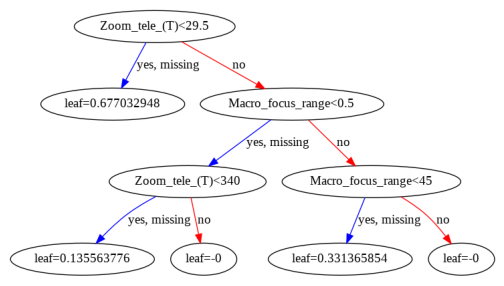

In [ ]:
#training and visualization of current model 
xg_reg = xgb.train(params=params, dtrain=data_dmatrix)
xgb.plot_tree(xg_reg, num_trees=1)
plt.show()

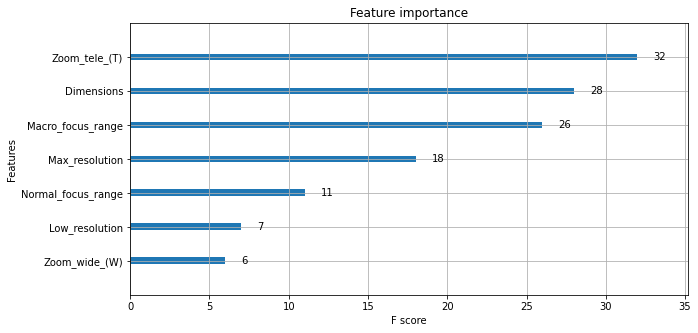

In [ ]:
# Feature importance 
xgb.plot_importance(xg_reg)
plt.show()

I will be switching back to a regression model as it doesn't make sense to run XGB regression of a classification model that has been label encoded. Best just to use the original regression data set. MAE will be in dollar terms as opposed to the numeric value of the categories I have created. 

## Hyperparameter Tuning XGB

In [ ]:
#Loading train and test data into DM matrices 
dtrain = xgb.DMatrix(xgr_train, label=ygr_train)
dtest = xgb.DMatrix(xgr_test, label=ygr_test)

In [ ]:
# Get the mean from the training data
mean_train = np.mean(ygr_train)
# Set baseline predictions as the mean result of the training set 
baseline_predictions = np.ones(ygr_test.shape) * mean_train
# Compute MAE of our predictions (training set mean) vs the result of true values (test set)
mae_baseline = mean_absolute_error(ygr_test, baseline_predictions)
print("Baseline MAE is {:.2f}".format(mae_baseline))

Baseline MAE is 402.86


In [ ]:
# Set (Default) Parameters that we are going to tune.
params = {
    'max_depth':6,
    'min_child_weight': 1,
    'eta':.3,
    'subsample': 1,
    'colsample_bytree': 1,
    # the data is in numerical terms
    'objective':'reg:linear',
}

#add eval metric to observe for tuning 
params['eval_metric'] = "mae"
#set num of boost rounds high to hopefully catch optimal 
num_boost_round = 999

In [ ]:
model = xgb.train(
    params,
    dtrain,
    num_boost_round=num_boost_round,
    # we are evaluating the test data set
    evals=[(dtest, "Test")],
    early_stopping_rounds=10
)
print("Best MAE: {:.3f} with {} rounds".format(
                 model.best_score,
                 model.best_iteration+1))

# this is the MAE of our model with default parameters

[01:06:46] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	Test-mae:313.14
Will train until Test-mae hasn't improved in 10 rounds.
[1]	Test-mae:255.798
[2]	Test-mae:235.228
[3]	Test-mae:226.08
[4]	Test-mae:223.834
[5]	Test-mae:227.99
[6]	Test-mae:233.051
[7]	Test-mae:231.453
[8]	Test-mae:231.136
[9]	Test-mae:233.989
[10]	Test-mae:234.761
[11]	Test-mae:234.919
[12]	Test-mae:235.496
[13]	Test-mae:236.208
[14]	Test-mae:236.78
Stopping. Best iteration:
[4]	Test-mae:223.834

Best MAE: 223.834 with 5 rounds


In [ ]:
#use built in CV to assist in tuning specific parameters
cv_results = xgb.cv(
    params,
    dtrain,
    num_boost_round=num_boost_round,
    seed=42,
    nfold=5,
    metrics={'mae'},
    early_stopping_rounds=10
)

cv_results

[01:06:47] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[01:06:47] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[01:06:47] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[01:06:47] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[01:06:47] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


train-mae-mean  train-mae-std  test-mae-mean  test-mae-std
0       340.320337      10.101078     350.279633     56.172646
1       268.567401       7.994840     299.579504     52.140945
2       234.419592       6.577473     278.992776     45.377942
3       217.015421       9.027035     276.698218     39.574190
4       204.103366       9.215190     274.669324     32.208378
5       194.211426       8.084288     273.905194     30.649454
6       184.402533       6.742197     270.977402     29.963662
7       176.435120       7.524685     271.418991     28.706867
8       169.411941       7.284208     269.711224     29.087578
9       162.975116       8.050001     268.041202     29.092347
10      156.553506       8.112295     267.019839     28.138600
11      151.019598       7.215117     266.949863     27.748322
12      144.836215       7.755477     265.352551     27.280005
13      140.135222       8.427864     265.741611     27.321903
14      134.021454       9.244060     263.620679     27.772774
15      129.467061      10.724831     262.910779     27.550409
16      123.930972       9.766414     260.880896     27.728404
17      120.554114      10.455967     260.053284     27.816435
18      117.289238       9.651187     260.665564     28.157897
19      113.789456      10.237816     260.088754     27.507212
20      108.874577      10.037718     260.385358     26.622705
21      105.116811       9.106263     260.648813     27.554728
22      101.730893       8.534790     260.266665     26.533766
23       97.359193       6.766090     258.557171     26.172807
24       93.838347       6.540781     257.798813     25.993970
25       90.707347       5.403413     257.305450     25.852297
26       87.832130       5.808457     256.696789     25.823134
27       84.198878       6.443178     256.788992     25.826558
28       81.387801       6.075612     256.640338     25.777011
29       79.064568       6.979547     256.676233     26.169751
30       76.125155       6.520717     256.579080     26.296624
31       74.595354       6.804263     256.783008     26.045966
32       72.053102       6.840559     256.393744     25.686112
33       69.396731       6.551131     255.811942     25.542433
34       66.442398       6.295568     255.464188     25.524735
35       64.698538       6.886061     255.417822     24.693471
36       62.631804       6.042434     255.456598     24.315732
37       60.394987       5.781006     255.175128     23.933439
38       58.249980       5.379379     254.913354     24.052881
39       56.302274       5.362523     254.351450     24.211214

In [ ]:
cv_results['test-mae-mean'].min()
#we will be trying to minimize this value in further CV
#this is the min value for the default model

254.35144959999997

In [ ]:
#start with max depth and min child weight
#establish ranges for the twon parameters to run through
possibilities = [
    (max_depth, min_child_weight)
    for max_depth in range(8,12)
    for min_child_weight in range(1,5
    )
]

In [ ]:
#create a for loop that check every combination in the range for the best CV MAE
min_mae = float("Inf")
best_params = None
for max_depth, min_child_weight in possibilities:
    print("CV with max_depth={}, min_child_weight={}".format(
                             max_depth,
                             min_child_weight))
    # Update parameters
    params['max_depth'] = max_depth
    params['min_child_weight'] = min_child_weight
    # Run the CV
    cv_results = xgb.cv(
        params,
        dtrain,
        num_boost_round=num_boost_round,
        seed=42,
        nfold=5,
        metrics={'mae'},
        early_stopping_rounds=10
    )
    # Update best MAE
    mean_mae = cv_results['test-mae-mean'].min()
    boost_rounds = cv_results['test-mae-mean'].argmin()
    print("\tMAE {} for {} rounds".format(mean_mae, boost_rounds))
    if mean_mae < min_mae:
        min_mae = mean_mae
        best_params = (max_depth,min_child_weight)
print("Best params: {}, {}, MAE: {}".format(best_params[0], best_params[1], min_mae))

CV with max_depth=8, min_child_weight=1
[01:06:47] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[01:06:47] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[01:06:47] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[01:06:47] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[01:06:47] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
	MAE 236.7938048 for 57 rounds
CV with max_depth=8, min_child_weight=2
[01:06:48] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[01:06:48] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [ ]:
#update params with best values 
params['max_depth'] = 10
params['min_child_weight'] = 2

In [ ]:
#repeat the process for subsample and colsample
#must allow for decimal values 
gridsearch_params = [
    (subsample, colsample)
    for subsample in [i/10. for i in range(7,11)]
    for colsample in [i/10. for i in range(7,11)]
]

In [ ]:
min_mae = float("Inf")
best_params = None
# We start by the largest values and go down to the smallest
for subsample, colsample in reversed(gridsearch_params):
    print("CV with subsample={}, colsample={}".format(
                             subsample,
                             colsample))
    # We update our parameters
    params['subsample'] = subsample
    params['colsample_bytree'] = colsample
    # Run CV
    cv_results = xgb.cv(
        params,
        dtrain,
        num_boost_round=num_boost_round,
        seed=42,
        nfold=5,
        metrics={'mae'},
        early_stopping_rounds=10
    )
    # Update best score
    mean_mae = cv_results['test-mae-mean'].min()
    boost_rounds = cv_results['test-mae-mean'].argmin()
    print("\tMAE {} for {} rounds".format(mean_mae, boost_rounds))
    if mean_mae < min_mae:
        min_mae = mean_mae
        best_params = (subsample,colsample)
print("Best params: {}, {}, MAE: {}".format(best_params[0], best_params[1], min_mae))

CV with subsample=1.0, colsample=1.0
[01:06:55] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[01:06:55] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[01:06:55] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[01:06:55] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[01:06:55] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
	MAE 244.4811674 for 20 rounds
CV with subsample=1.0, colsample=0.9
[01:06:55] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[01:06:55] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[01:06

In [ ]:
params['subsample'] = 1.0
params['colsample_bytree'] = 0.7

In [ ]:
#repeat for ETA using common range of values
min_mae = float("Inf")
best_params = None
for eta in [.3, .2, .1, .05, .01, .005]:
    print("CV with eta={}".format(eta))
    # We update our parameters
    params['eta'] = eta
    # Run and time CV
    cv_results = xgb.cv(
            params,
            dtrain,
            num_boost_round=num_boost_round,
            seed=42,
            nfold=5,
            metrics=['mae'],
            early_stopping_rounds=10
          )
    # Update best score
    mean_mae = cv_results['test-mae-mean'].min()
    boost_rounds = cv_results['test-mae-mean'].argmin()
    print("\tMAE {} for {} rounds\n".format(mean_mae, boost_rounds))
    if mean_mae < min_mae:
        min_mae = mean_mae
        best_params = eta
print("Best params: {}, MAE: {}".format(best_params, min_mae))

CV with eta=0.3
[01:07:02] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[01:07:02] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[01:07:02] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[01:07:03] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[01:07:03] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
	MAE 248.7547822 for 23 rounds

CV with eta=0.2
[01:07:03] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[01:07:03] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[01:07:03] WARNING: /workspace/src/objective/re

In [ ]:
params['eta'] = .1

In [ ]:
#train new model with ideal parameters and find min MAE
#there is a noticable acheivement from the original MAE
model = xgb.train(
    params,
    dtrain,
    num_boost_round=num_boost_round,
    evals=[(dtest, "Test")],
    early_stopping_rounds=10
)
print("Best MAE: {:.2f} in {} rounds".format(model.best_score, model.best_iteration+1))

[01:07:19] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	Test-mae:386.224
Will train until Test-mae hasn't improved in 10 rounds.
[1]	Test-mae:351.577
[2]	Test-mae:322.683
[3]	Test-mae:296.393
[4]	Test-mae:276.243
[5]	Test-mae:263.033
[6]	Test-mae:254.709
[7]	Test-mae:248.298
[8]	Test-mae:242.115
[9]	Test-mae:235.75
[10]	Test-mae:230.373
[11]	Test-mae:227.571
[12]	Test-mae:225.519
[13]	Test-mae:222.721
[14]	Test-mae:221.825
[15]	Test-mae:220.856
[16]	Test-mae:219.418
[17]	Test-mae:217.143
[18]	Test-mae:217.426
[19]	Test-mae:216.457
[20]	Test-mae:216.253
[21]	Test-mae:215.355
[22]	Test-mae:215.866
[23]	Test-mae:215.921
[24]	Test-mae:215.95
[25]	Test-mae:215.263
[26]	Test-mae:214.329
[27]	Test-mae:215.191
[28]	Test-mae:215.548
[29]	Test-mae:214.84
[30]	Test-mae:214.835
[31]	Test-mae:214.397
[32]	Test-mae:215.379
[33]	Test-mae:215.695
[34]	Test-mae:216.386
[35]	Test-mae:215.839
[36]	Test-mae:216.826
Stopping. Best i

In [ ]:
#opitimize model to only need minimum possible rounds now that we know what the optimal number is 
num_boost_round = model.best_iteration + 1
best_model = xgb.train(
    params,
    dtrain,
    num_boost_round=num_boost_round,
    evals=[(dtest, "Test")]
)

[01:07:19] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	Test-mae:386.224
[1]	Test-mae:351.577
[2]	Test-mae:322.683
[3]	Test-mae:296.393
[4]	Test-mae:276.243
[5]	Test-mae:263.033
[6]	Test-mae:254.709
[7]	Test-mae:248.298
[8]	Test-mae:242.115
[9]	Test-mae:235.75
[10]	Test-mae:230.373
[11]	Test-mae:227.571
[12]	Test-mae:225.519
[13]	Test-mae:222.721
[14]	Test-mae:221.825
[15]	Test-mae:220.856
[16]	Test-mae:219.418
[17]	Test-mae:217.143
[18]	Test-mae:217.426
[19]	Test-mae:216.457
[20]	Test-mae:216.253
[21]	Test-mae:215.355
[22]	Test-mae:215.866
[23]	Test-mae:215.921
[24]	Test-mae:215.95
[25]	Test-mae:215.263
[26]	Test-mae:214.329


## Visualizing the Model

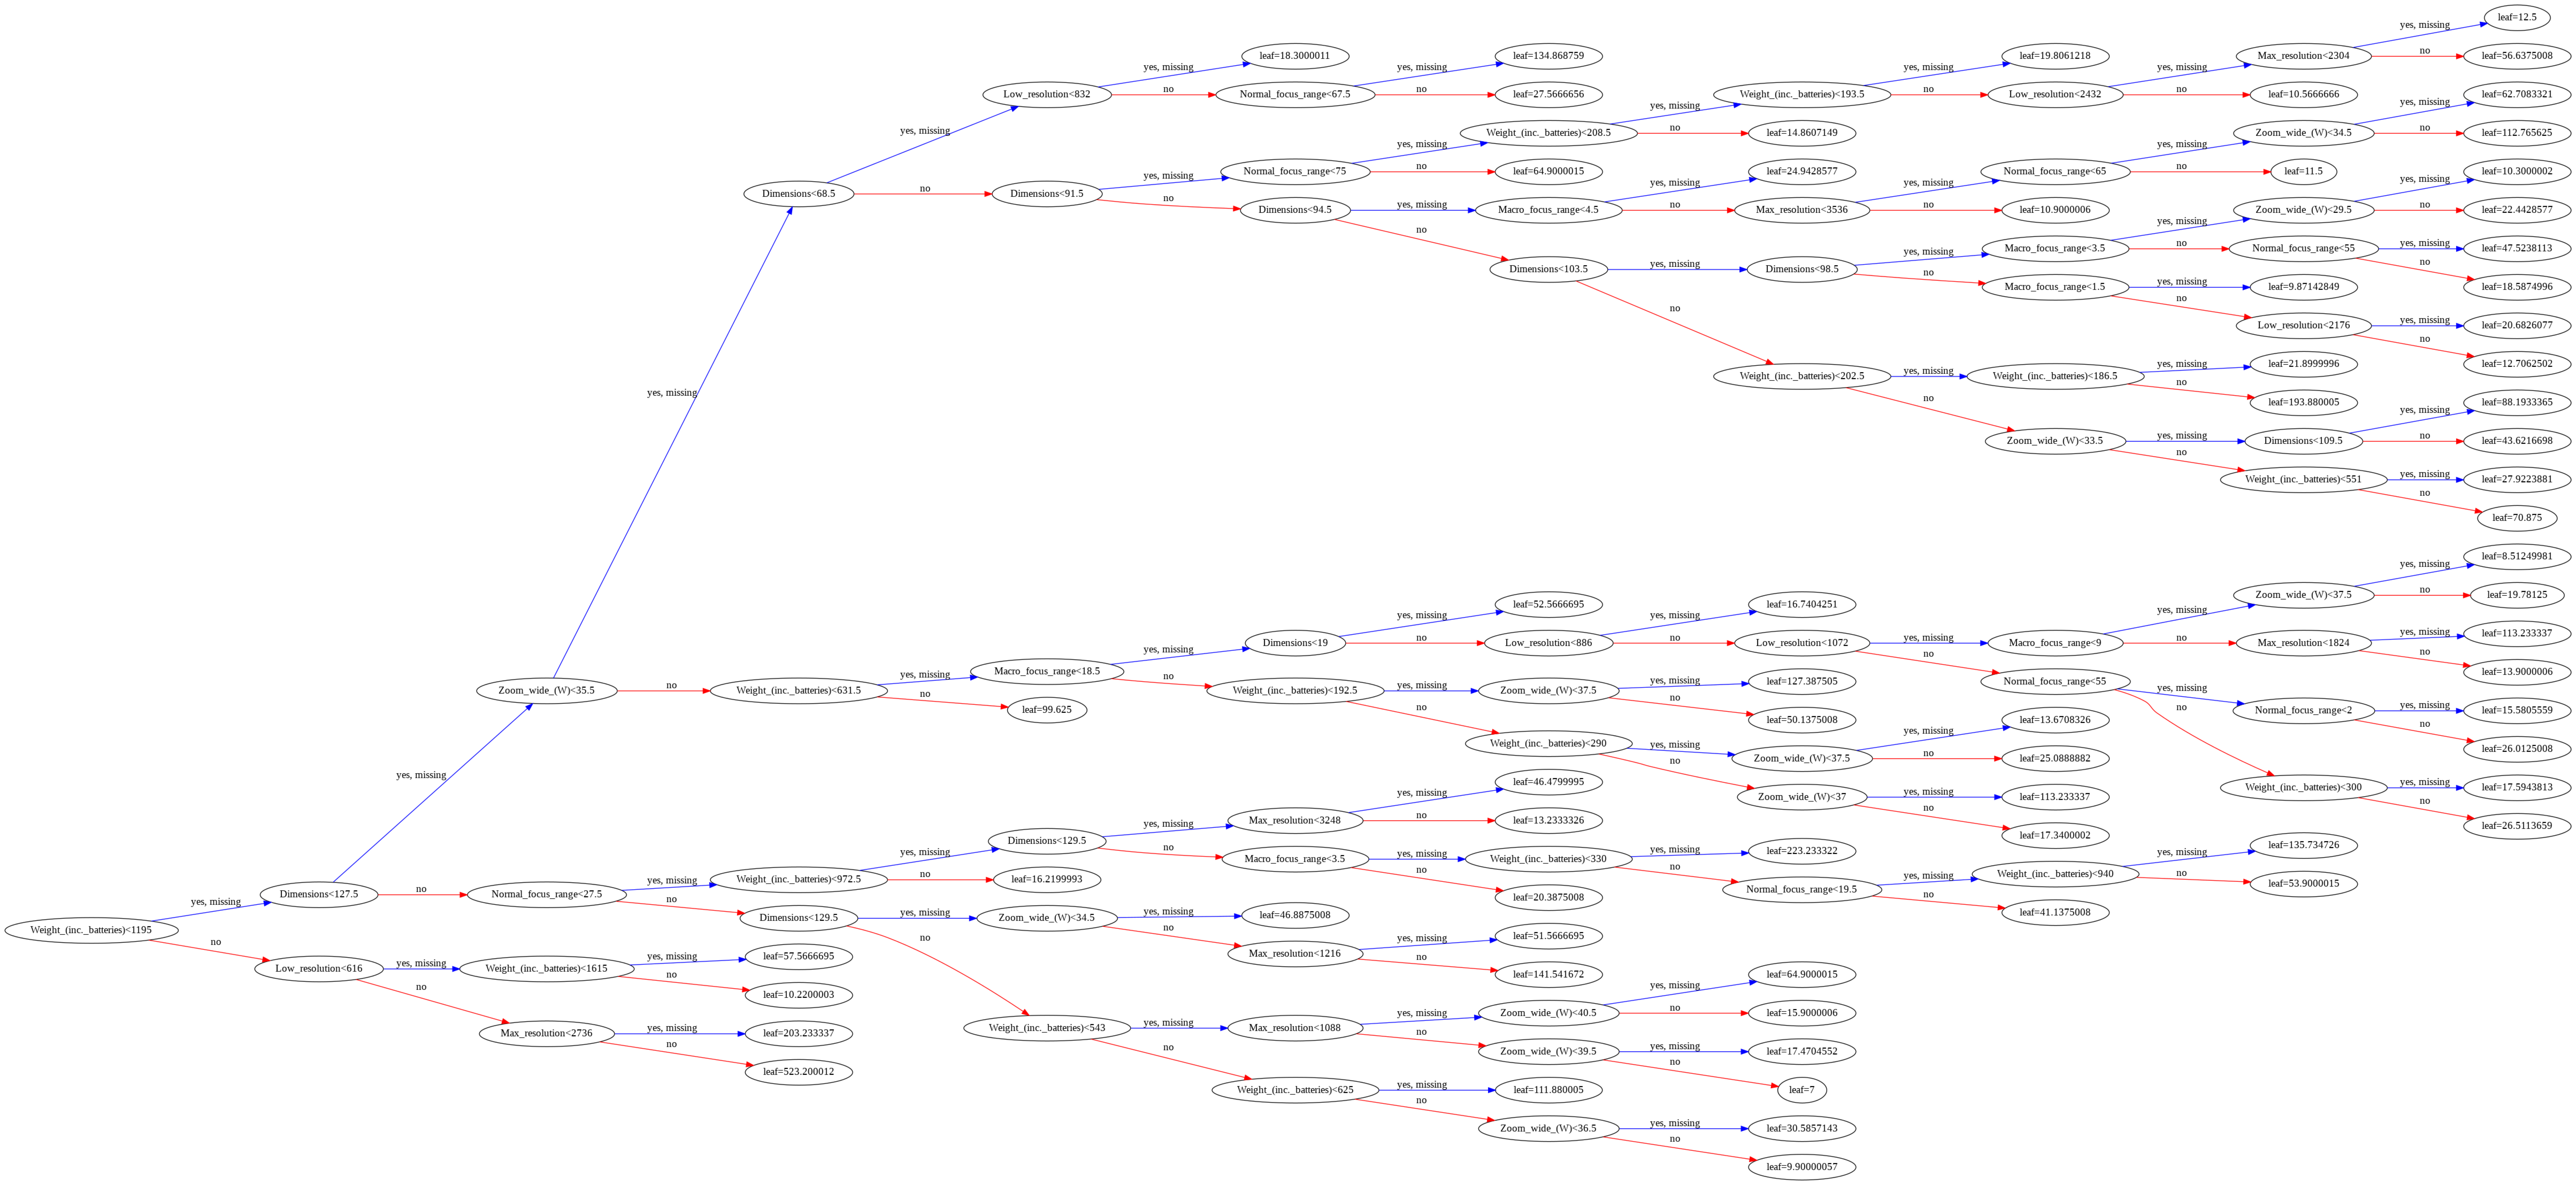

In [ ]:
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 150,100
xgb.plot_tree(best_model, rankdir='LR', num_trees=0)
plt.show()

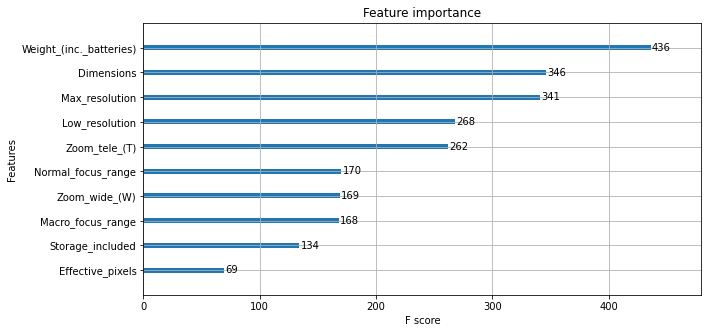

In [ ]:
#Feature importance 
rcParams['figure.figsize'] = 10,5
xgb.plot_importance(best_model)
plt.show()

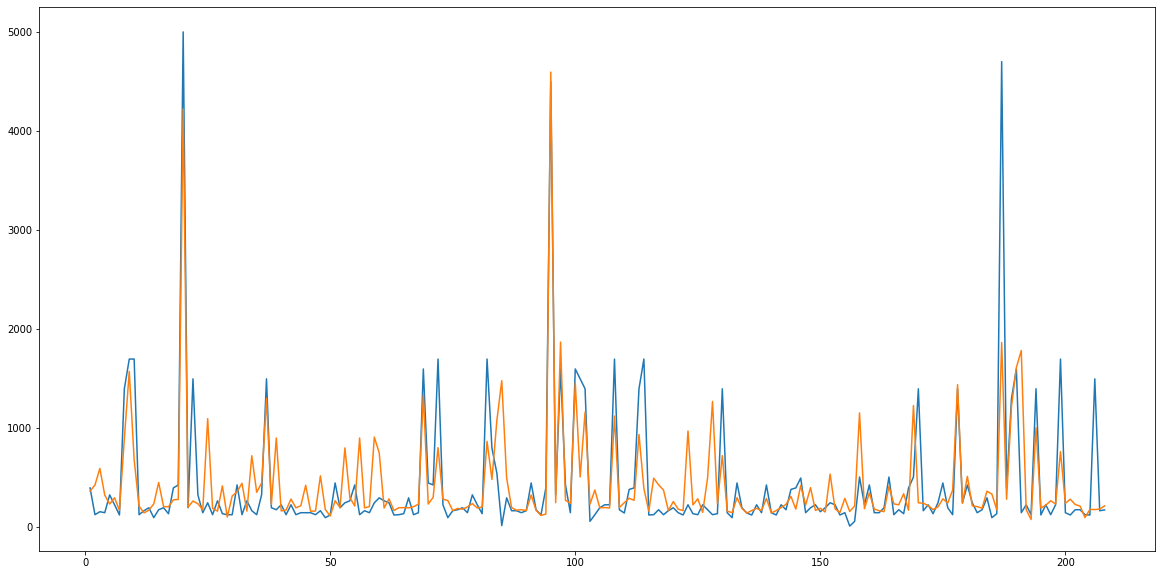

In [ ]:
#plot a comparison of predicted versus actual
preds = best_model.predict(dtest)
count = []
for x in range(1, 209):
  count.append(x)
#print(count)
#print(preds)

#plt.plot(preds)
plt.figure(figsize=(20, 10))
plt.plot(count, ygr_test)
plt.plot(count, preds)


